In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
dataset_path = '/content/creditcard.csv'
df = pd.read_csv(dataset_path)

In [22]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)


In [23]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)


In [24]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [25]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Chia dữ liệu train và val
X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)

# Chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)


In [26]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [27]:
def softmax(z):
    # Trừ đi giá trị lớn nhất trong z để tránh tràn số
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)


In [28]:
def predict(X, theta):
    z = np.dot(X, theta)
    return softmax(z)


In [29]:
def compute_loss(y_hat, y):
    # Thêm một số rất nhỏ để tránh log(0)
    return -np.mean(np.sum(y * np.log(y_hat + 1e-8), axis=1))


In [30]:
def compute_gradient(X, y, y_hat):
    # X.T là ma trận chuyển vị của X
    return np.dot(X.T, (y_hat - y)) / y.shape[0]


In [31]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient


In [32]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    predictions = np.argmax(y_hat, axis=1)  # Chọn lớp có xác suất cao nhất
    actual = np.argmax(y, axis=1)           # Chuyển nhãn y về dạng chỉ mục lớp
    return np.mean(predictions == actual)


In [33]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(2)

theta = np.random.randn(n_features, n_classes)


In [34]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        # Dự đoán
        y_hat = predict(X_i, theta)

        # Tính loss và gradient
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)

        # Cập nhật trọng số
        theta = update_theta(theta, gradient, lr)

        # Lưu lại loss và độ chính xác của batch
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    # Tính loss và độ chính xác trên tập validation
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    # Tính trung bình loss và accuracy cho toàn bộ epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Lưu lại kết quả của epoch
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # In kết quả của epoch hiện tại
    print(f'\nEPOCH {epoch + 1}: Training loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1: Training loss: 2.213	Validation loss: 1.589

EPOCH 2: Training loss: 1.155	Validation loss: 0.803

EPOCH 3: Training loss: 0.584	Validation loss: 0.414

EPOCH 4: Training loss: 0.312	Validation loss: 0.231

EPOCH 5: Training loss: 0.184	Validation loss: 0.144

EPOCH 6: Training loss: 0.121	Validation loss: 0.099

EPOCH 7: Training loss: 0.087	Validation loss: 0.073

EPOCH 8: Training loss: 0.067	Validation loss: 0.057

EPOCH 9: Training loss: 0.054	Validation loss: 0.046

EPOCH 10: Training loss: 0.045	Validation loss: 0.038

EPOCH 11: Training loss: 0.038	Validation loss: 0.033

EPOCH 12: Training loss: 0.033	Validation loss: 0.029

EPOCH 13: Training loss: 0.030	Validation loss: 0.026

EPOCH 14: Training loss: 0.027	Validation loss: 0.023

EPOCH 15: Training loss: 0.025	Validation loss: 0.021

EPOCH 16: Training loss: 0.023	Validation loss: 0.020

EPOCH 17: Training loss: 0.021	Validation loss: 0.018

EPOCH 18: Training loss: 0.020	Validation loss: 0.017

EPOCH 19: Training

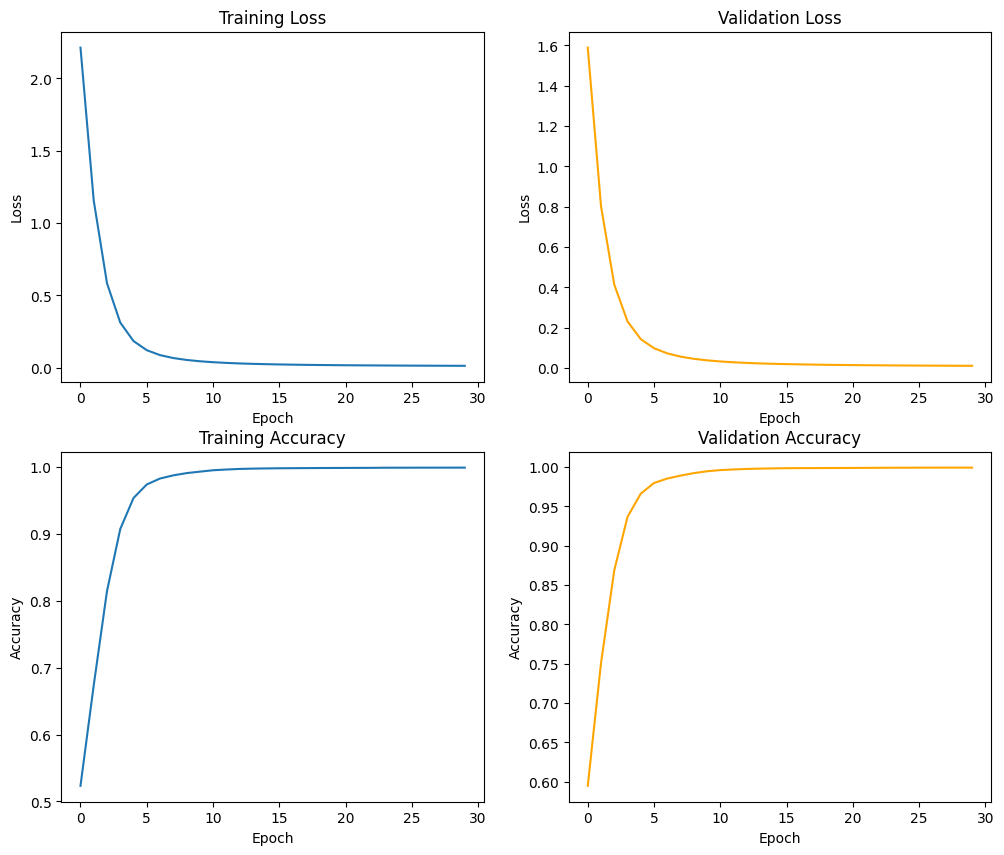

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Biểu đồ Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Biểu đồ Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Biểu đồ Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Biểu đồ Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [36]:
# Đánh giá mô hình trên tập validation và test
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

# In kết quả
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.4f}')
print(f'Test Accuracy: {test_set_acc:.4f}')


Evaluation on validation and test set:
Validation Accuracy: 0.9993
Test Accuracy: 0.9990
